# Daria Bromot - FS500047
## KNN

In [91]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [93]:
# create a classification dataset with 100 samples and 2 features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1)

# print the first 5 samples and their labels
print(X[:5])
print(y[:5])

[[-1.69159382 -1.30953741]
 [-0.87593647 -0.3956654 ]
 [ 0.2220643  -0.0886755 ]
 [ 0.24616353  0.87256979]
 [-1.26436902 -1.55378879]]
[1 1 0 0 1]


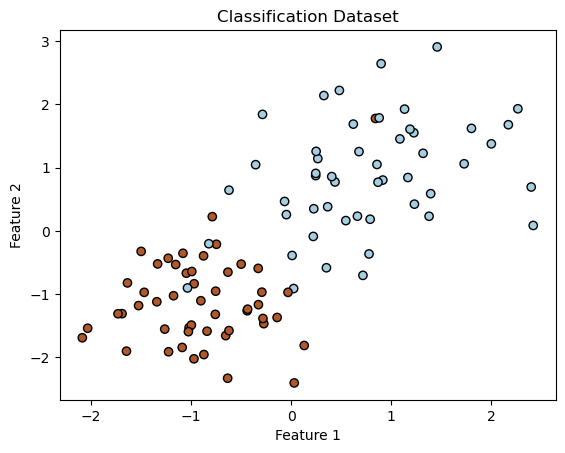

In [94]:
# plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black')

# set the axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')

# display the plot
plt.show()

## 1. Implement the KNN algorithm
Implement the kNN algorithm in python as a function.  
Use the Euclidean distance as the distance metric between data points.

In [95]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def kNN(X_train, y_train, X_test, k):    
    # Initialize an array to store the predicted labels
    y_pred = np.zeros(X_test.shape[0])
    
    # Loop over each test data point
    for i, x_test in enumerate(X_test):
        
        # Calculate the Euclidean distances between the test point and all training points
        distances = np.array([euclidean_distance(x_train, x_test) for x_train in X_train])
        
        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices]
        
        # Assign the most common label among the k nearest neighbors to the test point
        y_pred[i] = np.bincount(k_nearest_labels).argmax()
        
    return y_pred

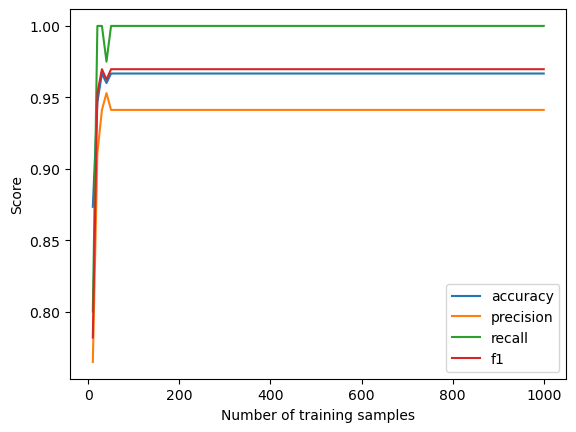

In [96]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the range of values of n_samples to use for the learning curve
n_range = range(10, 1001, 10)

# Define the number of runs for each subset size
n_runs = 5

# Initialize arrays to store the results
accuracy_scores = np.zeros(len(n_range))
precision_scores = np.zeros(len(n_range))
recall_scores = np.zeros(len(n_range))
f1_scores = np.zeros(len(n_range))

# Loop over the range of n_samples values
for i, n_samples in enumerate(n_range):
    
    # Initialize arrays to store the results of each run
    accuracy_results = np.zeros(n_runs)
    precision_results = np.zeros(n_runs)
    recall_results = np.zeros(n_runs)
    f1_results = np.zeros(n_runs)
    
    # Loop over the number of runs
    for j in range(n_runs):
        
        # Get a random subset of the training data
        subset_indices = np.random.choice(X_train.shape[0], size=min(n_samples, X_train.shape[0]), replace=False)
        X_subset = X_train[subset_indices]
        y_subset = y_train[subset_indices]
        
        # Fit the kNN model using k=5 and predict the labels of the test data
        y_pred = kNN(X_subset, y_subset, X_test, k=5)
        
        # Calculate the evaluation metrics for the predicted labels
        accuracy_results[j] = accuracy_score(y_test, y_pred)
        precision_results[j] = precision_score(y_test, y_pred)
        recall_results[j] = recall_score(y_test, y_pred)
        f1_results[j] = f1_score(y_test, y_pred)
        
    # Take the mean of the results over the runs and store them in the arrays
    accuracy_scores[i] = np.mean(accuracy_results)
    precision_scores[i] = np.mean(precision_results)
    recall_scores[i] = np.mean(recall_results)
    f1_scores[i] = np.mean(f1_results)

# Plot the learning curve
plt.plot(n_range, accuracy_scores, label='accuracy')
plt.plot(n_range, precision_scores, label='precision')
plt.plot(n_range, recall_scores, label='recall')
plt.plot(n_range, f1_scores, label='f1')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [97]:
print("Accuracy:", np.sum(y_pred == y_test)/len(y_test))

Accuracy: 0.9666666666666667


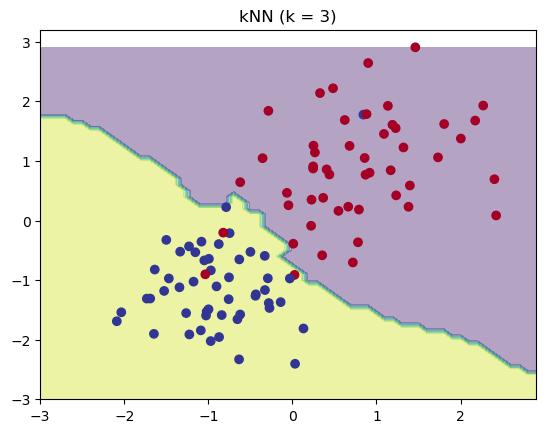

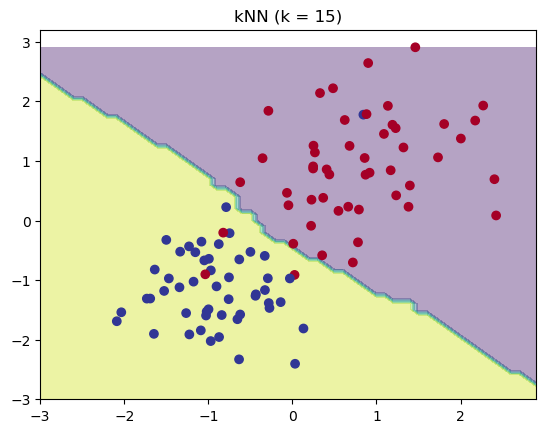

In [98]:
# Create a meshgrid for the feature space
xx, yy = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Classify the feature space with kNN and different values of k
for k in [3, 15]:
    y_pred = kNN(X, y, X_grid, k)
    y_pred = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    
    plt.title(f"kNN (k = {k})")
    plt.show()

## 2. Passing a function as a parameter
Change your code so that it accepts function as one of the input parameters, and uses this function to calculate the distance between points. Run your code with both a function for Euclidean distance and for cosine distance.

In [99]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def cosine_distance(x1, x2):
    return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

def KNN(X_train, y_train, X_test, k, distance_func):
    # Initialize an array to store the predicted labels
    y_pred = np.zeros(X_test.shape[0])

    # Loop over each test data point
    for i, x_test in enumerate(X_test):

        # Calculate the distances between the test point and all training points using the specified distance metric function
        distances = np.array([distance_func(x_train, x_test) for x_train in X_train])

        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices]

        # Assign the most common label among the k nearest neighbors to the test point
        y_pred[i] = np.bincount(k_nearest_labels).argmax()

    return y_pred

In [100]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply the kNN function with Euclidean distance
y_pred = KNN(X_train, y_train, X_test, k=5, distance_func=euclidean_distance)

# print the predicted labels and the true labels
print("Predicted labels:", y_pred)
print("True labels:", y_test)
print("Accuracy:", np.sum(y_pred == y_test)/len(y_test))

Predicted labels: [0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
True labels: [0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0]
Accuracy: 1.0


In [101]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply the kNN function with Euclidean distance
y_pred = KNN(X_train, y_train, X_test, k=5, distance_func=cosine_distance)

# print the predicted labels and the true labels
print("Predicted labels:", y_pred)
print("True labels:", y_test)
print("Accuracy:", np.sum(y_pred == y_test)/len(y_test))

Predicted labels: [0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
True labels: [0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0]
Accuracy: 1.0


## 3. Object Oriented Programming in Python
Implement the KNN algorithm using a class, that follows the Scikit-learn API of init, fit and predict methods.  
More information about object oriented programming in Python is in these links:
1. https://realpython.com/python3-object-oriented-programming/
1. http://www.tutorialspoint.com/python/python_classes_objects.htm
1. https://www.youtube.com/watch?v=ZDa-Z5JzLYM
1. https://docs.python.org/3/tutorial/classes.html


In [102]:
class KNNClassifier:
    def __init__(self, k=5, distance_func='euclidean'):
        self.k = k
        if distance_func == 'euclidean':
            self.distance_func = self.euclidean_distance
        elif distance_func == 'cosine':
            self.distance_func = self.cosine_distance
        else:
            self.distance_func = distance_func
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x_test in enumerate(X):
            distances = np.array([self.distance_func(x_train, x_test) for x_train in self.X_train])
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            y_pred[i] = np.bincount(k_nearest_labels).argmax()
        return y_pred
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def cosine_distance(self, x1, x2):
        return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))


In [103]:
# Create an instance of the KNNClassifier with k=5 and euclidean distance metric
knn = KNNClassifier(k=5, distance_func='euclidean')

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# print the predicted labels and the true labels
print("Predicted labels:", y_pred)
print("True labels:", y_test)
print("Accuracy:", np.sum(y_pred == y_test)/len(y_test))

Predicted labels: [0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
True labels: [0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0]
Accuracy: 1.0


## 4. Decision boundary
Given a dataset you create with 2 classes, plot the decision boundary of a KNN algorithm in 2D for k = 3 and k = 15.

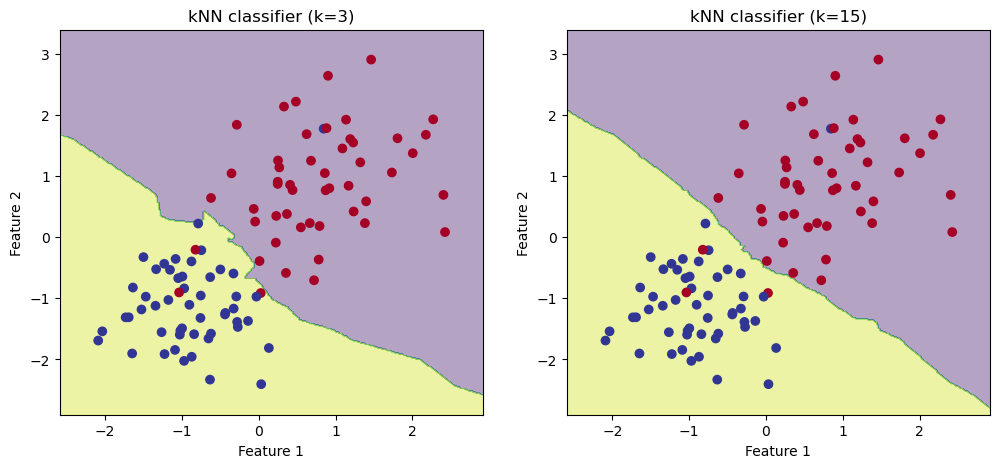

In [104]:
# create a kNN classifier with k=3 and fit it to the dataset
knn3 = KNNClassifier(k=3, distance_func='euclidean')
knn3.fit(X, y)

# create a kNN classifier with k=15 and fit it to the dataset
knn15 = KNNClassifier(k=15, distance_func='euclidean')
knn15.fit(X, y)

# plot the decision boundary of the kNN classifiers
h = 0.02  # step size in the meshgrid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = knn3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)
Z15 = knn15.predict(np.c_[xx.ravel(), yy.ravel()])
Z15 = Z15.reshape(xx.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z3, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('kNN classifier (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z15, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('kNN classifier (k=15)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## 5. Learning Curve
Plot a learning curve for the kNN algorithm - change the number of points used as true labels in range 10 to 1000, and compare the algorithm’s performance on the set from question 4.  
For subsets of the data points, average the results of several runs.  
Plot the overall accuracy, precision, recall and f1 scores.  
Use k = 5.
These links provide additional information on the learning curve:
1. https://www.dataquest.io/blog/learning-curves-machine-learning/
1. http://www.ritchieng.com/machinelearning-learning-curve/


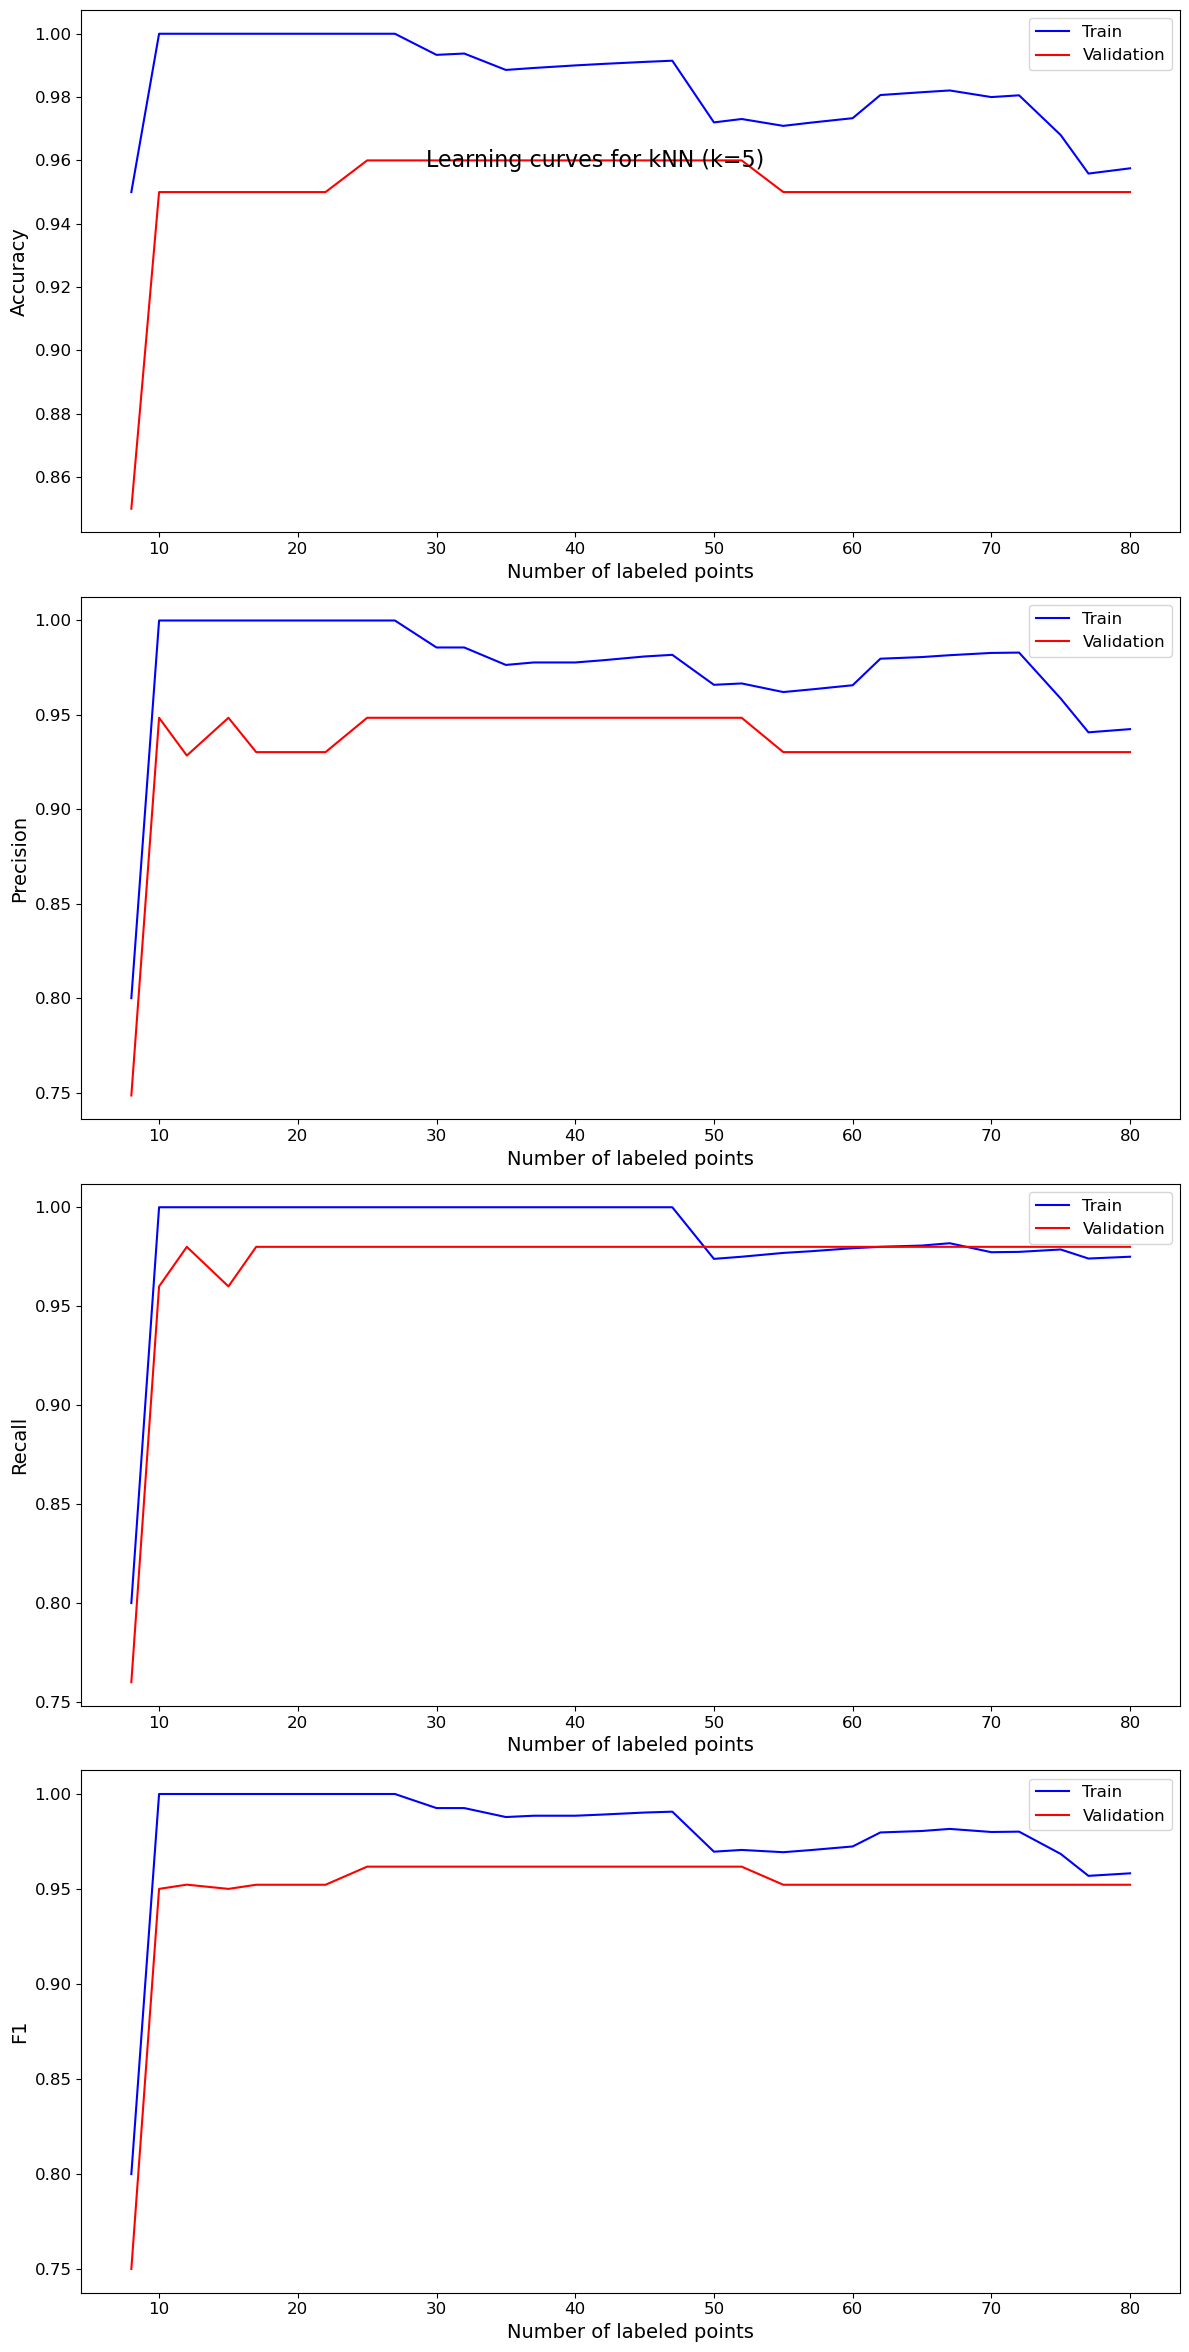

In [105]:
# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 30)

# Create a figure with subplots for each metric
fig, axes = plt.subplots(4, 1, figsize=(12, 24))
fig.suptitle('Learning curves for kNN (k=5)', fontsize=16, y=0.92)

# Loop over each metric and subplot
for ax, metric in zip(axes.ravel(), ('accuracy', 'precision', 'recall', 'f1')):    
    # Compute the learning curve for the metric
    train_sizes, train_scores, validation_scores = learning_curve(estimator=KNeighborsClassifier(n_neighbors=5),
                                                                  X=X, y=y, train_sizes=train_sizes,
                                                                  cv=5, scoring=metric)
    # Compute the mean score for each training set size
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    # Plot the learning curve
    ax.plot(train_sizes, train_scores_mean, color='blue', label='Train')
    ax.plot(train_sizes, validation_scores_mean, color='red', label='Validation')
    ax.set_ylabel(metric.capitalize(), fontsize=14)
    ax.set_xlabel('Number of labeled points', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


## 6. Effect of k
Plot the performance of the KNN algorithm for different values of k. Plot the f1 metric.


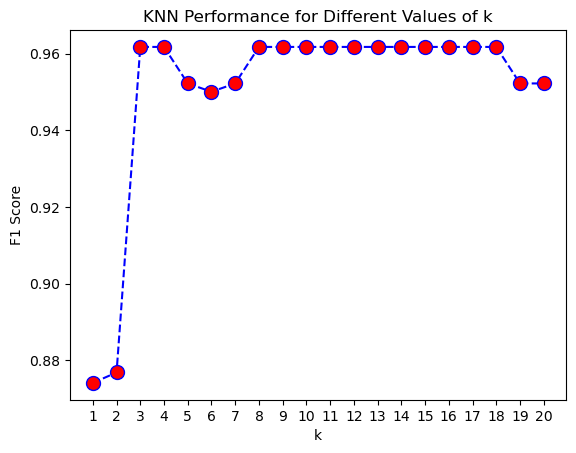

In [106]:
# Define the range of k values to use
k_values = range(1, 21)

# Create an empty list to store the f1 scores for each k value
f1_scores = []

# Loop over each k value and compute the f1 score
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    f1 = np.mean(cross_val_score(knn, X, y, cv=5, scoring='f1'))
    f1_scores.append(f1)

# Plot the f1 scores for each k value
plt.plot(k_values, f1_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('KNN Performance for Different Values of k')
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.xticks(k_values)
plt.show()


## 7. Precision vs. Recall
We’ve talked in class about how in different scenarios we might prefer to maximize precision or recall. How would you prefer one over the other in the KNN algorithm?

The choice between maximizing precision or recall in the KNN algorithm will depend on the specific problem and the associated costs and benefits of each outcome. 

For example, if the problem involves identifying individuals with a certain medical condition, a high recall would be preferable because it would minimize false negatives and ensure that as many affected individuals as possible are identified. However, this would come at the cost of a lower precision, as some healthy individuals may also be classified as having the condition. In this case, the cost of a false negative (not identifying an individual with the condition) may be considered higher than the cost of a false positive (misclassifying a healthy individual).

On the other hand, if the problem involves identifying spam emails, a high precision would be preferable because it would minimize false positives and ensure that legitimate emails are not incorrectly labeled as spam. In this case, the cost of a false positive (flagging a legitimate email as spam) may be considered higher than the cost of a false negative (not identifying a spam email).

In summary, the choice between maximizing precision or recall in the KNN algorithm (or any classification algorithm) will depend on the specific problem and the associated costs and benefits of each outcome. It is important to carefully consider these factors and choose the performance metric that best aligns with the goals of the application.